In [1]:
import os
import uproot as ur
import zfit
from zfit import z
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from utils.getPreselection import *
import pandas as pd
from matplotlib import pylab
from utils.plotFunctions import *
import mplhep
import pickle
import argparse

In [2]:
import os

In [3]:
i=0

l=[]
for i in range(40):

    plotdir='/home/hep/davide/public_html/RKHighq2/sensitivity_studies/BDTOptimization/fits_40/'+str(i)+'/'
    filename='/fit_results_'+str(i)+'.pickle'
    #if i==1:continue
    #if not (i % 2) == 0: continue
    if i==39:continue
    with open(plotdir+'/fit_results_'+str(i)+'.pickle', 'rb') as handle:
        l.append(pickle.load(handle))


In [4]:
comb=[]
comb_err=[]
sig=[]
sig_err=[]
cuts=[]
for i in range(0,len(l)):
#    i=j*2
    sig.append(l[i]['sigYield'])
    sig_err.append(l[i]['sigYieldErr'])
    comb.append(l[i]['combYield'])
    comb_err.append(l[i]['combYieldErr'])
    cuts.append(l[i]['BDTCut'])
    

In [5]:
cuts_np=np.array(cuts)
sig_np=np.array(sig)
sig_err_np=np.array(sig_err)
comb_np=np.array(comb)
comb_err_np=np.array(comb_err)

In [6]:
fom=sig_np/np.sqrt(np.add(sig_np,comb_np))


In [7]:
len(fom),len(cuts_np)

(39, 39)

In [8]:
cuts_np

array([0.        , 0.1844039 , 0.29314335, 0.3705397 , 0.43067598,
       0.47986397, 0.52148275, 0.55755417, 0.58938462, 0.61786723,
       0.6436397 , 0.66717326, 0.68882601, 0.70887645, 0.72754548,
       0.74501123, 0.76141947, 0.77689098, 0.79152697, 0.80541307,
       0.81862239, 0.83121784, 0.84325397, 0.85477833, 0.86583269,
       0.87645387, 0.88667456, 0.89652386, 0.90602781, 0.91520982,
       0.92409099, 0.9326904 , 0.94102538, 0.94911172, 0.95696382,
       0.96459487, 0.97201696, 0.97924126, 0.98627801])

In [9]:
fom_err=np.sqrt((1./(4*np.power(sig_np+comb_np,3))) * (np.power(sig_np+2*comb_np,2)* sig_err_np*sig_err_np + sig_np*sig_np*comb_err_np*comb_err_np))




<ErrorbarContainer object of 3 artists>

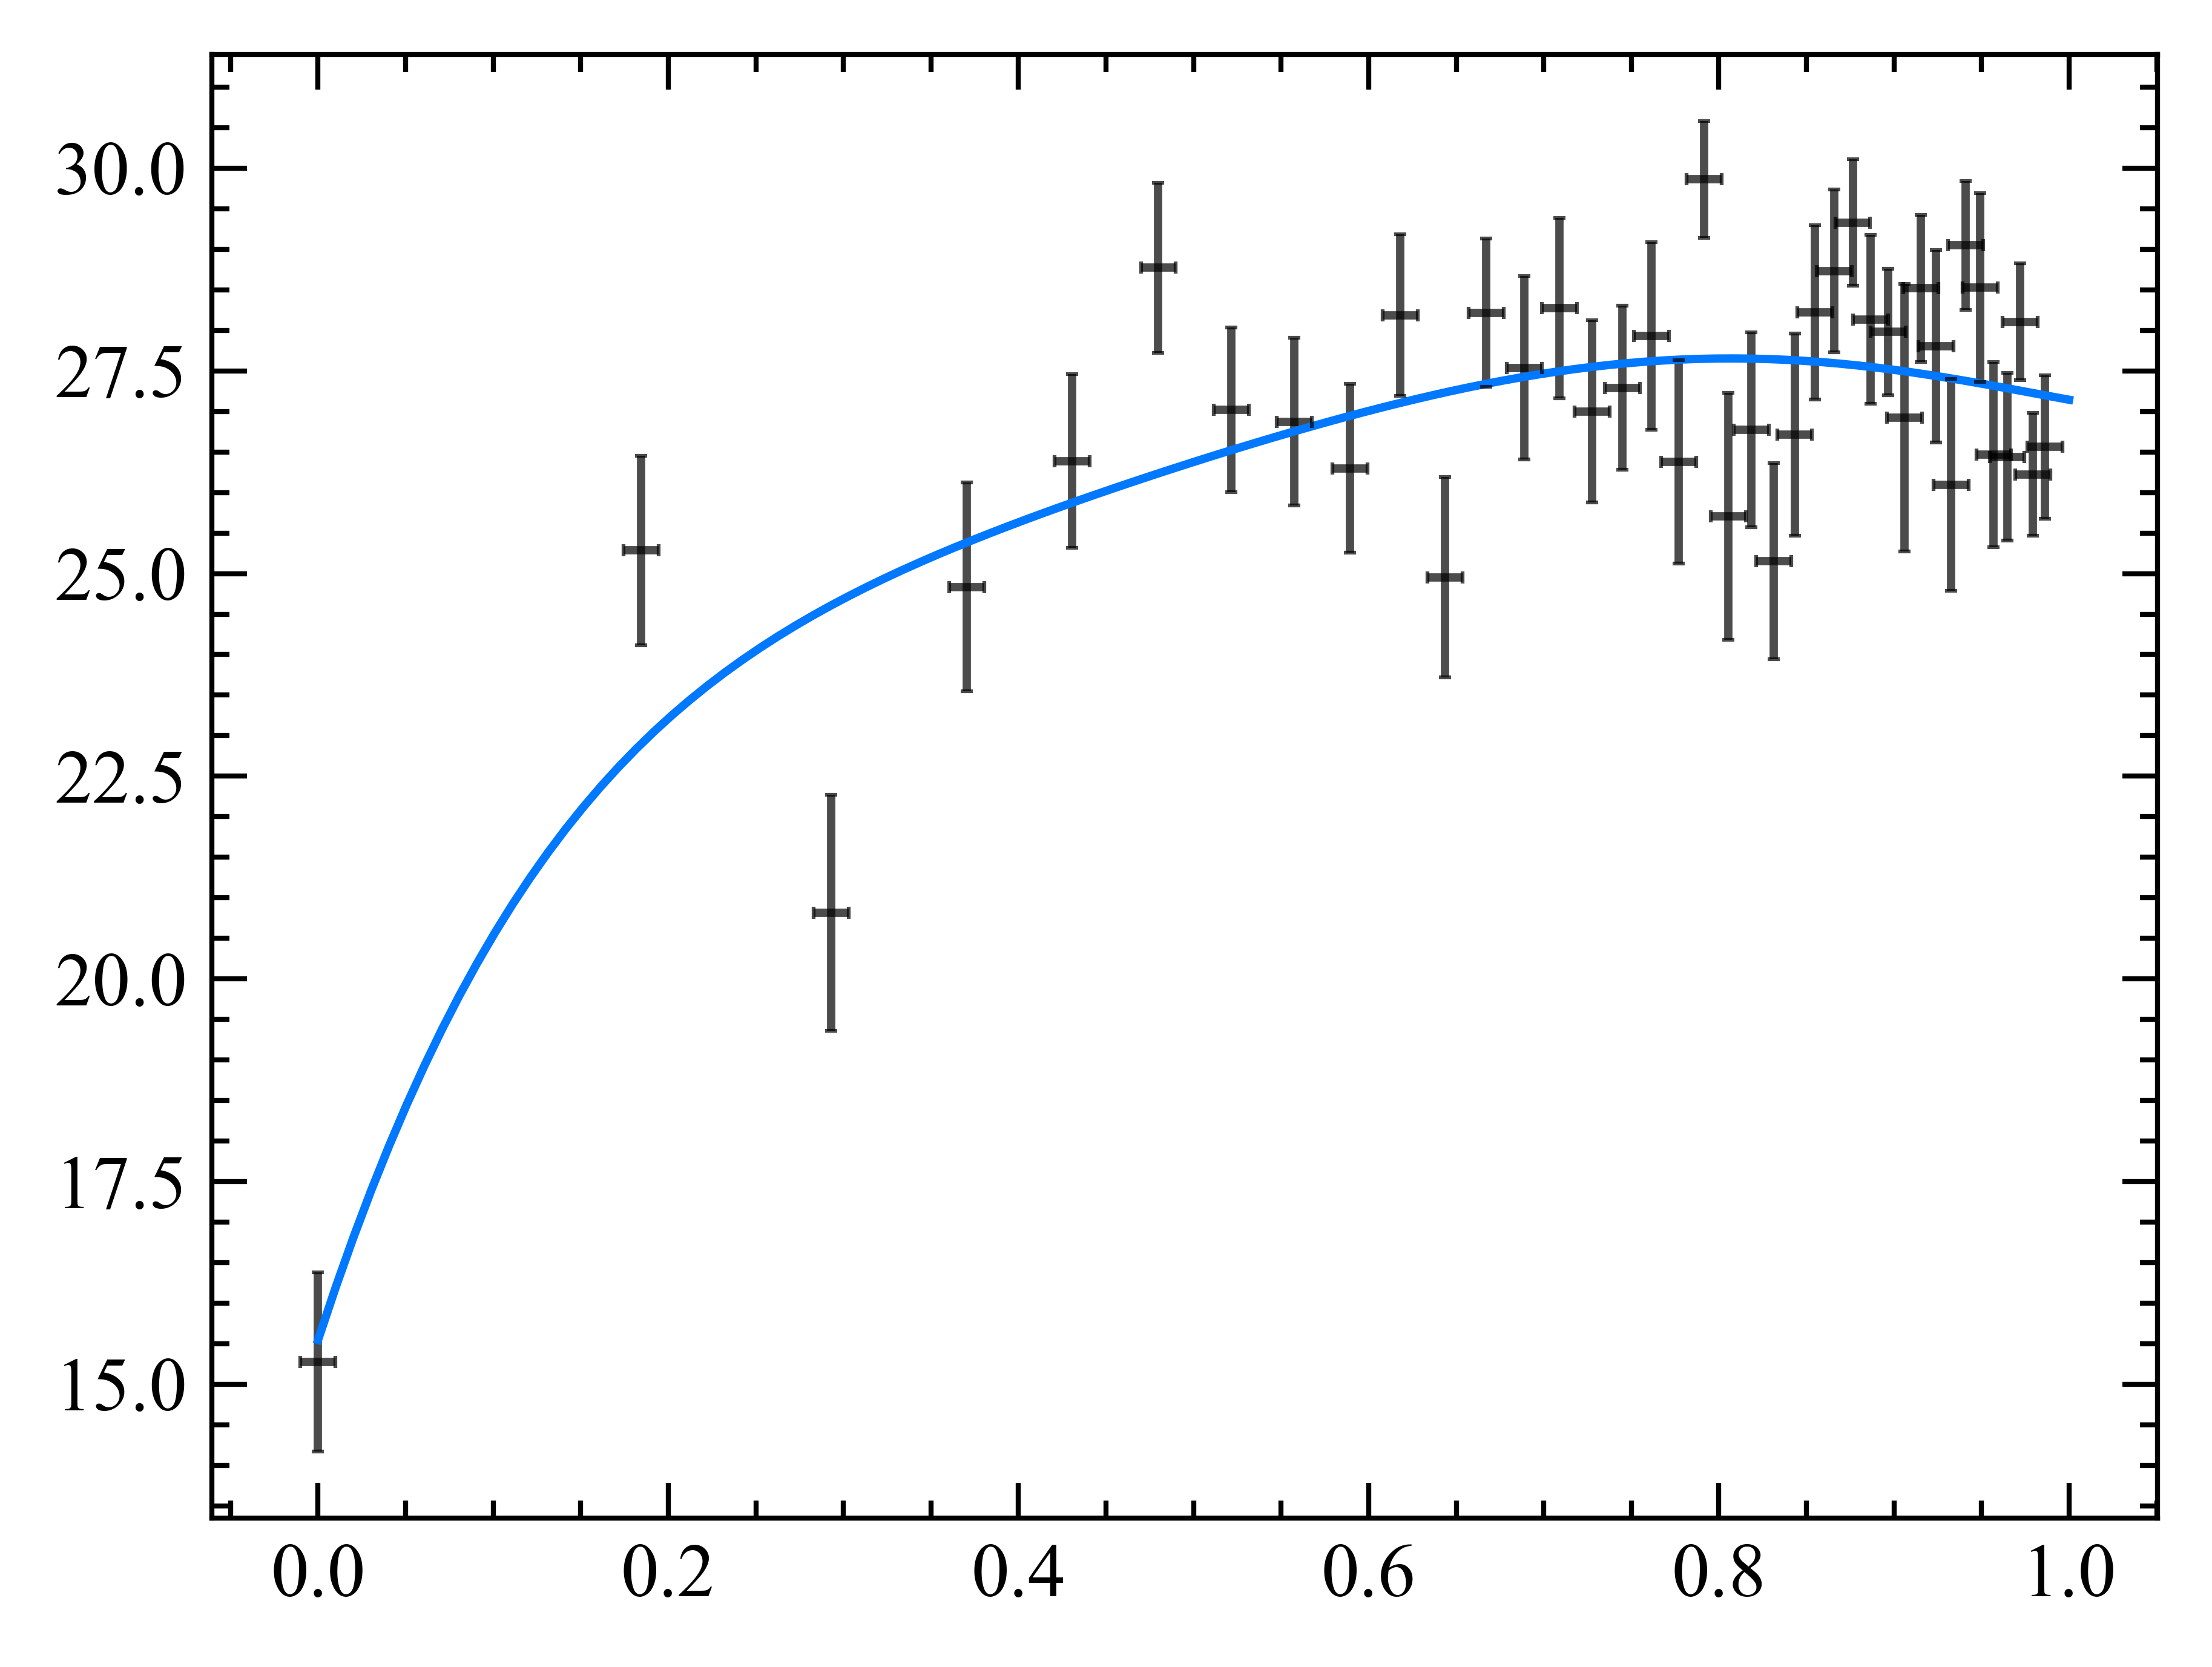

In [10]:
z = np.polyfit(cuts_np, fom, 5)
p = np.poly1d(z)
plt.plot(np.linspace(0,1,100),p(np.linspace(0,1,100)))
plt.errorbar(cuts_np, fom, xerr=0.01,yerr=fom_err, color='black', alpha=0.7, linestyle = '')

In [11]:
np.max(p(np.linspace(0,1,200)))
a=np.where(p(np.linspace(0,1,200))==np.max(p(np.linspace(0,1,200))))
np.linspace(0,1,200)[a[0][0]]

0.8090452261306533

In [12]:
sig_np,comb_np

(array([1100.02830254,  906.71940615,  758.95040639,  872.74631981,
         890.98601501,  972.68170817,  902.84046139,  877.22028027,
         867.61264008,  920.04028402,  818.99484662,  910.65608535,
         901.73552287,  918.7244834 ,  845.9052671 ,  881.81407465,
         898.01062388,  849.65195006,  934.5141834 ,  829.35707754,
         858.85687801,  774.9430521 ,  818.01755832,  865.29433377,
         889.53749381,  899.61134575,  850.41064883,  822.55289121,
         853.22053705,  858.43934535,  844.80999012,  781.56595234,
         871.20928712,  857.68322327,  784.47109083,  779.53127896,
         815.95067235,  727.11022514,  739.14413681]),
 array([4087.05262577,  379.01366834,  570.43427423,  362.24800294,
         249.05164255,  170.2596173 ,  213.69405202,  188.2667689 ,
         220.87902375,  145.25908553,  258.04089171,  130.81937928,
         170.62104377,  137.09318821,  135.62853035,  162.33174166,
         135.59295835,  187.96354908,   44.73017825,  211.609

In [46]:
def getFom(S, B, S_err, B_err):
    
    fom=S/np.sqrt(np.add(S,B))
    err=np.sqrt((1./(4*np.power(S+B,3))) * (np.power(S+2*B,2)* S_err*S_err + S*S*B_err*B_err))
    
    return fom, err

In [47]:
getFom(sig_np, comb_np, sig_err_np, comb_err_np)

(array([15.27363287, 25.28701132, 20.81555826, 24.83450714, 26.38829247,
        28.77125332, 27.01935254, 26.87414003, 26.29743055, 28.18843782,
        24.95549059, 28.21823672, 27.53655275, 28.27423263, 27.00033173,
        27.28955476, 27.93215682, 26.37684415, 29.86347605, 25.70533204,
        26.77047901, 25.15116876, 26.71743984, 28.22000356, 28.7328627 ,
        29.33093524, 28.13448271, 27.97989409, 26.92585176, 28.51886571,
        27.8071224 , 26.09517397, 29.04899088, 28.53150249, 26.46808411,
        26.44085784, 28.10427736, 26.22486498, 26.56129393]),
 array([1.10684482, 1.16852358, 1.4543857 , 1.28915617, 1.0727119 ,
        1.04844169, 1.01653031, 1.0355317 , 1.04161814, 0.99441561,
        1.23627606, 0.9118753 , 1.13130866, 1.11059445, 1.12451027,
        1.01151798, 1.15845958, 1.25368533, 0.71901417, 1.523783  ,
        1.20227974, 1.20998717, 1.2471411 , 1.07425346, 1.00580462,
        0.7770497 , 1.04081574, 0.78314726, 1.64987691, 0.90771263,
        1.18774739,

In [48]:
sig_np

array([1100.02830254,  906.71940615,  758.95040639,  872.74631981,
        890.98601501,  972.68170817,  902.84046139,  877.22028027,
        867.61264008,  920.04028402,  818.99484662,  910.65608535,
        901.73552287,  918.7244834 ,  845.9052671 ,  881.81407465,
        898.01062388,  849.65195006,  934.5141834 ,  829.35707754,
        858.85687801,  774.9430521 ,  818.01755832,  865.29433377,
        889.53749381,  899.61134575,  850.41064883,  822.55289121,
        853.22053705,  858.43934535,  844.80999012,  781.56595234,
        871.20928712,  857.68322327,  784.47109083,  779.53127896,
        815.95067235,  727.11022514,  739.14413681])

In [49]:
thereWasMerging=True
i=0

S_temp=np.array(sig)
S_err_temp=np.array(sig_err)
B_temp=np.array(comb)
B_err_temp=np.array(comb_err)
BDT_cut_temp=np.array(cuts)

while(thereWasMerging):
    
    thereWasMerging=False
    
    while i<len(S_temp)-1:
    
        prev_fom, prev_fom_err = getFom(S_temp[i],B_temp[i],S_err_temp[i],B_err_temp[i])
        next_fom, next_fom_err = getFom(S_temp[i+1],B_temp[i+1],S_err_temp[i+1],B_err_temp[i+1])
    
        val=np.abs(prev_fom-next_fom)
        err=np.sqrt(prev_fom_err**2+next_fom_err**2)
    
        if(val<2.5*err):
            thereWasMerging=True
            S_temp[i+1]+=S_temp[i]
            B_temp[i+1]+=B_temp[i]
            S_err_temp[i+1]=np.sqrt(S_err_temp[i]**2+S_err_temp[i+1]**2)
            B_err_temp[i+1]=np.sqrt(B_err_temp[i]**2+B_err_temp[i+1]**2)
            BDT_cut_temp[i+1]=(BDT_cut_temp[i]+BDT_cut_temp[i+1])/2.            
            
            S_temp = np.delete(S_temp, i)
            B_temp = np.delete(B_temp, i)   
            S_err_temp = np.delete(S_err_temp, i)
            B_err_temp = np.delete(B_err_temp, i) 
            BDT_cut_temp = np.delete(BDT_cut_temp, i) 
            
            
        i+=1

In [50]:
a,b=getFom(S_temp,B_temp,S_err_temp,B_err_temp)

In [51]:
c=np.linspace(0,1,len(a))

In [52]:
BDT_cut_temp

array([0.        , 0.23877363, 0.40060784, 0.50067336, 0.5734694 ,
       0.63075346, 0.67799963, 0.71821096, 0.75321535, 0.78420898,
       0.81201773, 0.83723591, 0.86030551, 0.88156422, 0.90127583,
       0.9196504 , 0.93685789, 0.95303777, 0.96830591, 0.98275964])

Text(0, 1, '$\\frac{S}{\\sqrt{S+B}}$')

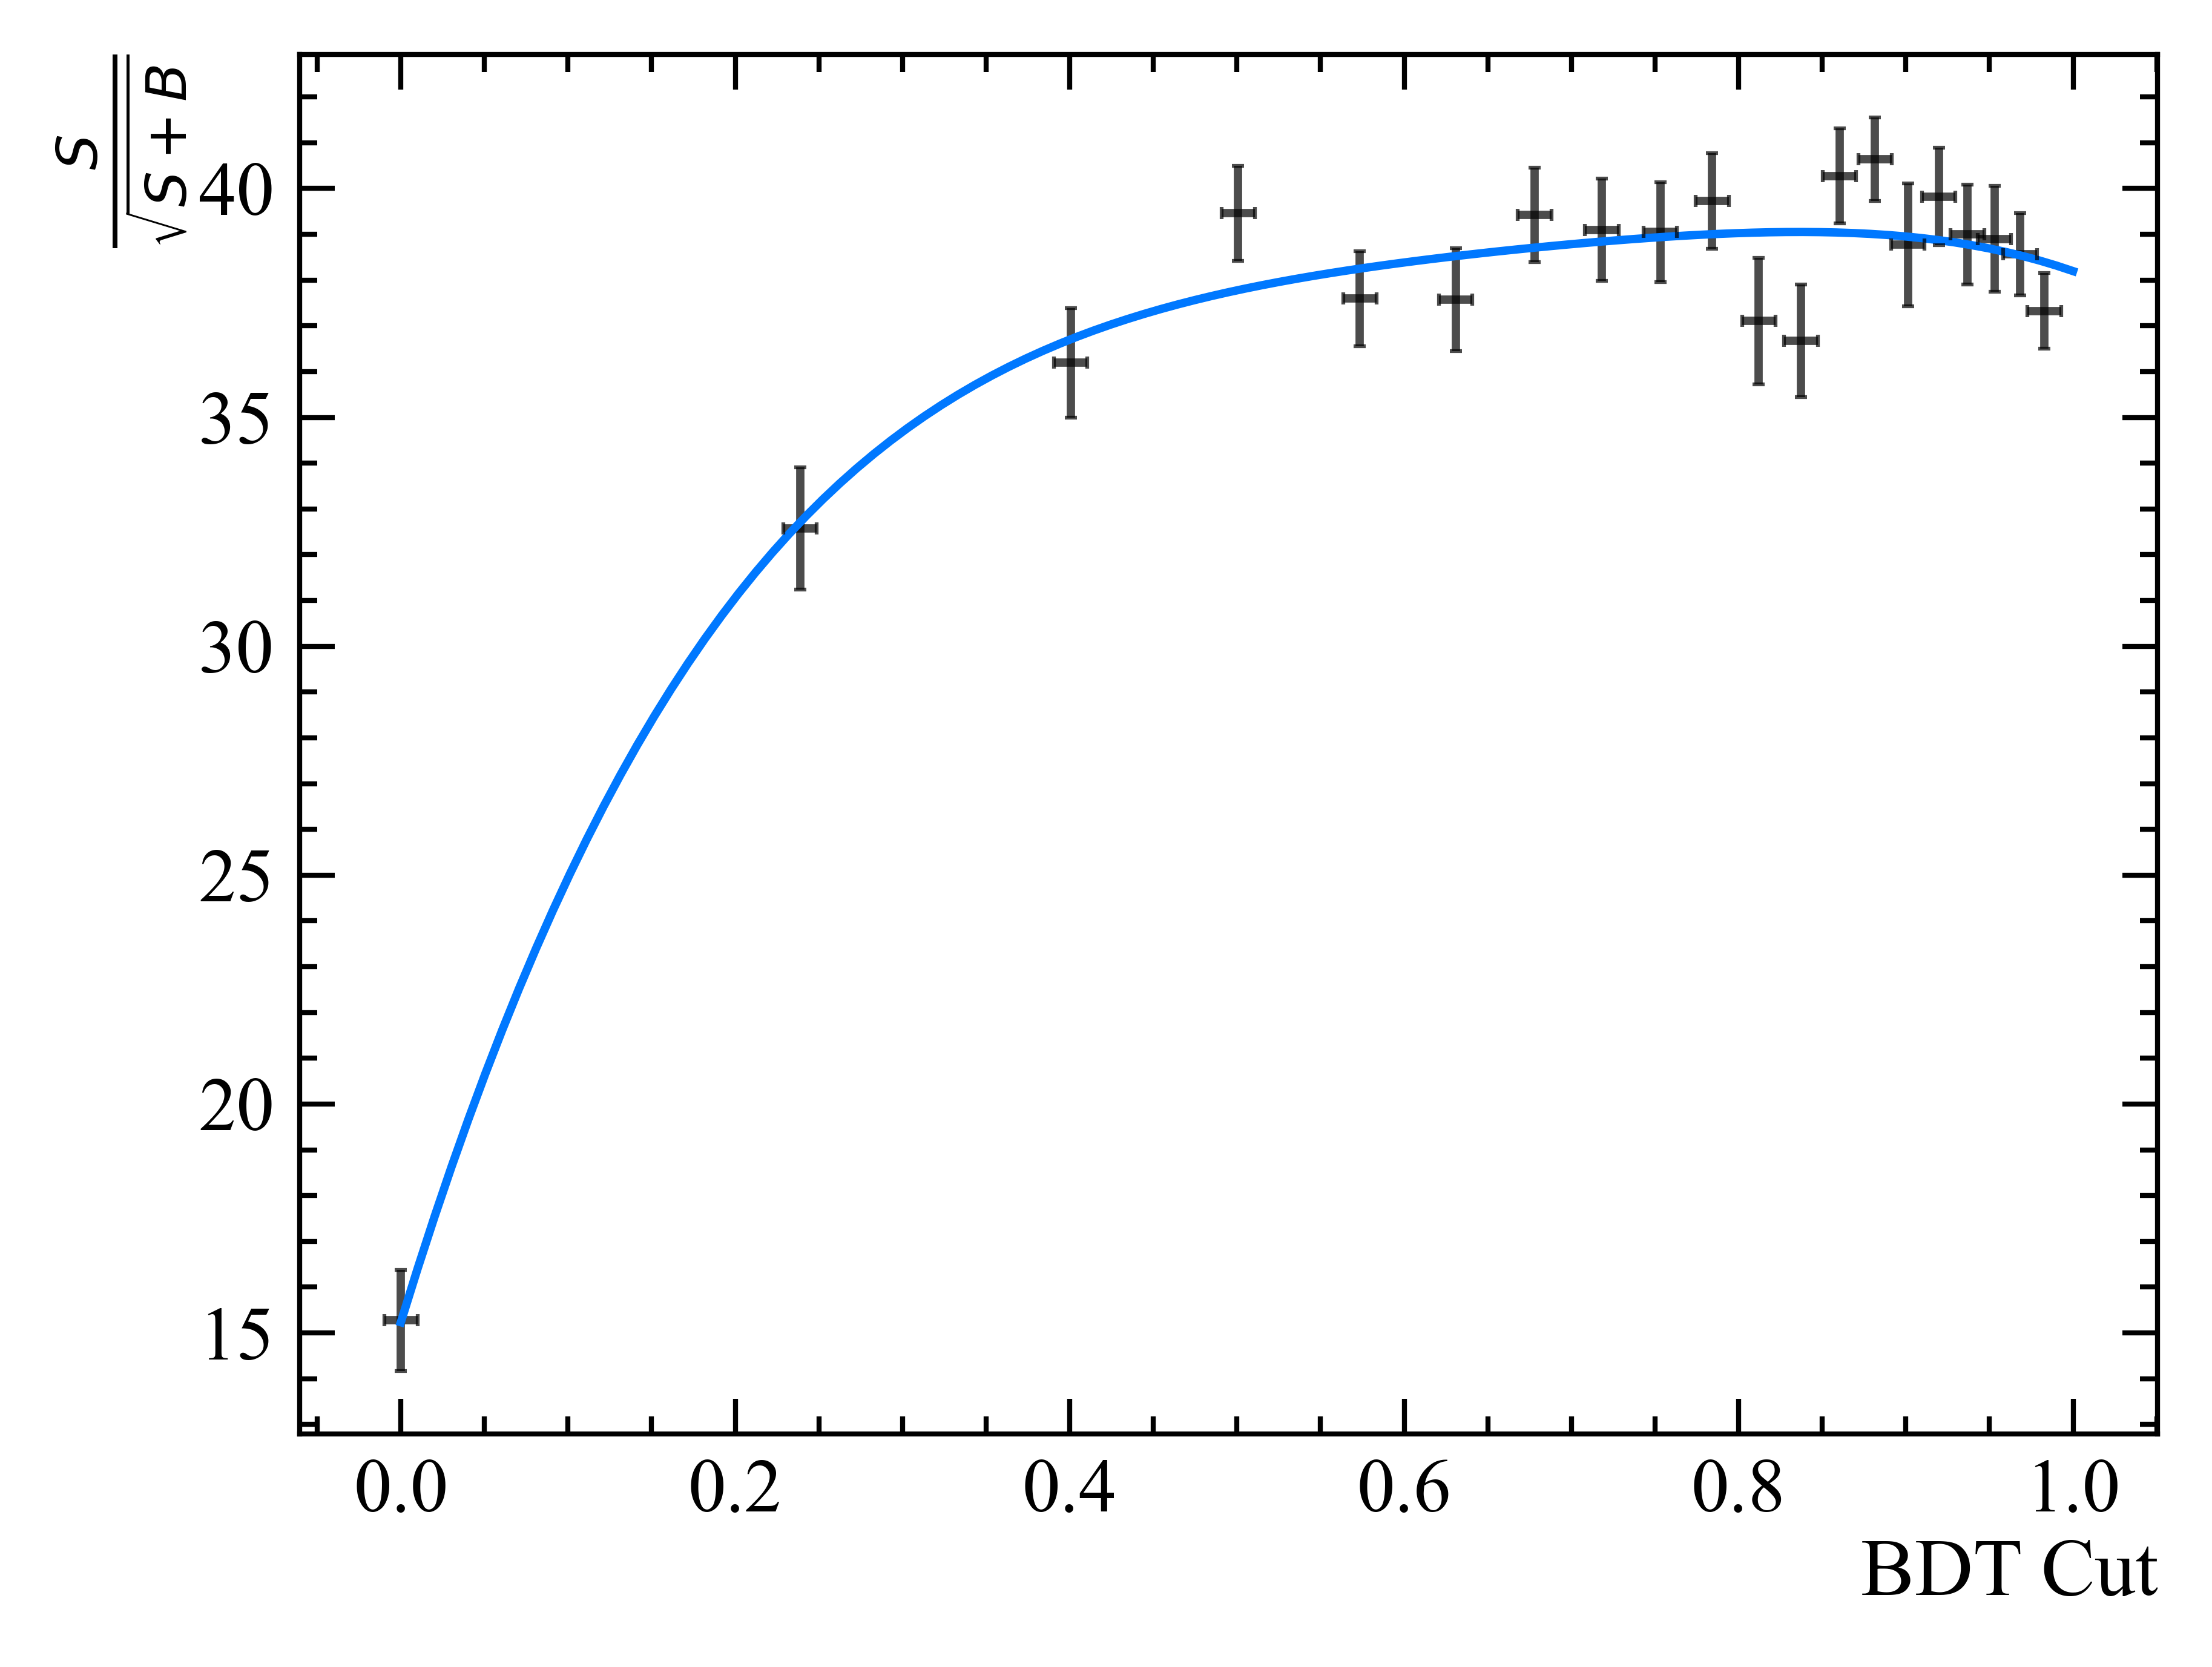

In [56]:
#plt.plot(cuts_np,p(cuts_np))

#plt.errorbar(BDT_cut_temp, a, xerr=0.01,yerr=b, color='black', alpha=0.7, linestyle = '')

z = np.polyfit(BDT_cut_temp, a, 4)
p = np.poly1d(z)
plt.plot(np.linspace(0,1,100),p(np.linspace(0,1,100)))
plt.errorbar(BDT_cut_temp, a, xerr=0.01,yerr=b, color='black', alpha=0.7, linestyle = '')
plt.xlabel('BDT Cut')
plt.ylabel(r'$\frac{S}{\sqrt{S+B}}$')


In [57]:
np.max(p(np.linspace(0,1,200)))
a=np.where(p(np.linspace(0,1,200))==np.max(p(np.linspace(0,1,200))))
np.linspace(0,1,200)[a[0][0]]

0.8341708542713568

In [58]:
cuts_np

array([0.        , 0.1844039 , 0.29314335, 0.3705397 , 0.43067598,
       0.47986397, 0.52148275, 0.55755417, 0.58938462, 0.61786723,
       0.6436397 , 0.66717326, 0.68882601, 0.70887645, 0.72754548,
       0.74501123, 0.76141947, 0.77689098, 0.79152697, 0.80541307,
       0.81862239, 0.83121784, 0.84325397, 0.85477833, 0.86583269,
       0.87645387, 0.88667456, 0.89652386, 0.90602781, 0.91520982,
       0.92409099, 0.9326904 , 0.94102538, 0.94911172, 0.95696382,
       0.96459487, 0.97201696, 0.97924126, 0.98627801])

In [59]:
np.where(cuts_np==0.83121784)

(array([21]),)

In [60]:
np.where(cuts_np==0.61786723)

(array([9]),)

In [61]:
sig_err_np[21]/sig_np[21]

0.061888602888182584

In [62]:
sig_err_np[9]/sig_np[9]

0.05095021049322716

In [63]:
sig_err_np[0]/sig_np[0]

0.07983672748275346